In [6]:
# install libraries

!pip install sentence-transformers


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.1/44.1 kB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 5.1 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 447.6/447.6 kB 14.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 150.8/150.8 MB 18.3 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.0/10.0 MB 34.3 MB/s eta 0:00:00 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 392.0/392.0 kB 16.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 25.9 MB/s eta 0:00:0000:0100:01


In [9]:

!pip install sentence-transformers faiss-cpu


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 17.5 MB/s eta 0:00:0000:0100:01


In [ ]:
!pip install jupyterlab_widgets


In [2]:
# Import Libraries

from sentence_transformers import SentenceTransformer
import faiss
import numpy as np


In [4]:
# Prepare FAQ Data

# List of FAQs
faqs = [
    "How can I reset my password?",
    "Where can I find the login page?",
    "How do I contact customer support?",
    "What are the store opening hours?",
    "Can I change my email address?",
    "How do I recover my account if I forgot my password?"
]

# Corresponding answers
answers = [
    "To reset your password, click 'Forgot Password' on the login page.",
    "You can find the login page at the top-right corner of the homepage.",
    "You can contact customer support via email or our hotline number.",
    "Our store is open from 9 AM to 9 PM, Monday through Saturday.",
    "Yes, you can change your email in the account settings.",
    "If you forgot your password, click 'Forgot Password' to recover it."
]


### Step 3: Create Vector Embeddings for FAQs

In [6]:
# Use a pre-trained model to convert FAQ questions into vectors:

# Load a lightweight sentence embedding model
model = SentenceTransformer('all-MiniLM-L6-v2')

# Generate vector embeddings for FAQ questions
faq_vectors = model.encode(faqs)


### Step 4: Store Vectors in FAISS

In [11]:
# Initialize FAISS index
vector_dim = faq_vectors.shape[1]  
# Get the vector size (e.g., 384)

vector_dim

384

In [13]:
faiss_index = faiss.IndexFlatL2(vector_dim)  
# Use L2 (Euclidean) distance

faiss_index

<faiss.swigfaiss.IndexFlatL2; proxy of <Swig Object of type 'faiss::IndexFlatL2 *' at 0x19de20450> >

In [15]:
faiss_index.add(faq_vectors)  
# Add FAQ vectors to the FAISS index

print(f"Number of vectors in the index: {faiss_index.ntotal}")

Number of vectors in the index: 6


In [19]:
print(f"All vectors: {faiss_index.reconstruct(0)}")

All vectors: [ 9.22948995e-04 -6.38559684e-02 -7.05079064e-02 -3.67879383e-02
 -4.61683199e-02  7.17813522e-02  3.95389367e-03  1.59717649e-02
  6.14729747e-02  1.90859661e-02 -4.48764935e-02  4.29484993e-02
  5.40021397e-02 -4.44442853e-02 -3.75677980e-02 -1.22552784e-02
 -5.76017685e-02  1.38455003e-01 -2.51712129e-02 -8.27855021e-02
  6.70216978e-03 -2.43445039e-02 -4.44698595e-02 -1.45147080e-02
 -7.13776238e-03 -1.08554084e-02 -1.14432648e-02  2.61538532e-02
 -1.02489777e-01 -9.39235836e-03  1.45421056e-02  1.59708466e-02
  1.21759092e-02  2.73316484e-02 -8.05693679e-03  3.12251300e-02
 -6.03093579e-02  5.48359845e-03  5.50971031e-02 -1.29131768e-02
 -8.95381719e-02 -8.15503299e-03 -9.04160067e-02  3.31196561e-02
  9.28542912e-02  2.31684428e-02 -3.95381227e-02  6.56168014e-02
  4.24307026e-02 -2.54289410e-03  1.13383122e-01  8.28620698e-03
  2.29941728e-03 -2.71336138e-02 -7.57493824e-02  5.34742139e-02
  5.55976555e-02  6.20594881e-02  4.76288125e-02  4.77160886e-02
  1.12569388

In [23]:
# Retrieve vectors and map them back to original sentences
for i in range(faiss_index.ntotal):
    vector = faiss_index.reconstruct(i)
    print(f"Index {i}, Sentence: {faqs[i]}, Vector: {vector}")

Index 0, Sentence: How can I reset my password?, Vector: [ 9.22948995e-04 -6.38559684e-02 -7.05079064e-02 -3.67879383e-02
 -4.61683199e-02  7.17813522e-02  3.95389367e-03  1.59717649e-02
  6.14729747e-02  1.90859661e-02 -4.48764935e-02  4.29484993e-02
  5.40021397e-02 -4.44442853e-02 -3.75677980e-02 -1.22552784e-02
 -5.76017685e-02  1.38455003e-01 -2.51712129e-02 -8.27855021e-02
  6.70216978e-03 -2.43445039e-02 -4.44698595e-02 -1.45147080e-02
 -7.13776238e-03 -1.08554084e-02 -1.14432648e-02  2.61538532e-02
 -1.02489777e-01 -9.39235836e-03  1.45421056e-02  1.59708466e-02
  1.21759092e-02  2.73316484e-02 -8.05693679e-03  3.12251300e-02
 -6.03093579e-02  5.48359845e-03  5.50971031e-02 -1.29131768e-02
 -8.95381719e-02 -8.15503299e-03 -9.04160067e-02  3.31196561e-02
  9.28542912e-02  2.31684428e-02 -3.95381227e-02  6.56168014e-02
  4.24307026e-02 -2.54289410e-03  1.13383122e-01  8.28620698e-03
  2.29941728e-03 -2.71336138e-02 -7.57493824e-02  5.34742139e-02
  5.55976555e-02  6.20594881e-02 

### 4. Visualize Data

In [ ]:
# If the stored vectors are high-dimensional, consider visualizing them in 2D using techniques 
# like PCA or t-SNE. For example:

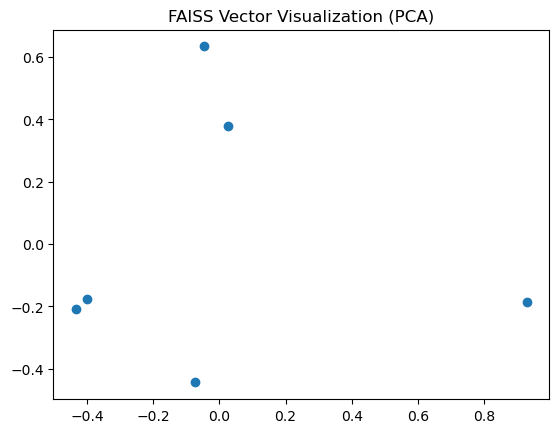

In [26]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Retrieve all vectors
vectors = [faiss_index.reconstruct(i) for i in range(faiss_index.ntotal)]

# Reduce dimensions to 2 for visualization
pca = PCA(n_components=2)
reduced_vectors = pca.fit_transform(vectors)

# Plot
plt.scatter(reduced_vectors[:, 0], reduced_vectors[:, 1])
plt.title("FAISS Vector Visualization (PCA)")
plt.show()


### Step 5: Search for Similar FAQs

In [29]:
# Now, take a user query and find the most relevant FAQs:

# User query
query = "I forgot my password. How can I recover it?"

# Convert query into a vector
query_vector = model.encode([query])

# Perform similarity search
k = 2  

# Number of top matches to retrieve
distances, indices = faiss_index.search(query_vector, k)

# Display results
print(f"Query: {query}\n")
print("Top Matches:")
for i, idx in enumerate(indices[0]):
    print(f"{i+1}. {faqs[idx]} (Distance: {distances[0][i]:.4f})")
    print(f"   Answer: {answers[idx]}\n")



Query: I forgot my password. How can I recover it?

Top Matches:
1. How do I recover my account if I forgot my password? (Distance: 0.1398)
   Answer: If you forgot your password, click 'Forgot Password' to recover it.

2. How can I reset my password? (Distance: 0.3201)
   Answer: To reset your password, click 'Forgot Password' on the login page.



### Summary

In [ ]:
- Embed FAQs: Each FAQ question is converted into a vector that represents its semantic meaning.
- Embed Query: The user’s query is also converted into a vector.
- Compare Vectors: FAISS searches for the closest vectors to the query vector (the most semantically similar FAQs).
- Display Results: Retrieve the top matches and show their answers.
                                 